In [1]:
from astropy.table import Table as Table
from astropy.io import fits as fits
import matplotlib.pyplot as plt
import matplotlib
import math
import numpy as np
import imp
from scipy.integrate import simps

hon = imp.load_source('honpy.py', '/Users/nicho/Documents/Hons Stuff/chronostar/projects/Nich_honours/honpy.py')

In [2]:
check=fits.open('spheresyn/3_naive_naive_age_check/3_naive_naive_age_check_data_SIMMD_AGES.fits')
joined=Table.read(check,hdu=1)

joined.columns

<TableColumns names=('name','component','age','x0','y0','z0','u0','v0','w0','x_now','y_now','z_now','u_now','v_now','w_now','ra','ra_error','dec','dec_error','parallax','parallax_error','pmra','pmra_error','pmdec','pmdec_error','radial_velocity','radial_velocity_error','X','X_error','Y','Y_error','Z','Z_error','U','U_error','V','V_error','W','W_error','X_Y_corr','X_Z_corr','X_U_corr','X_V_corr','X_W_corr','Y_Z_corr','Y_U_corr','Y_V_corr','Y_W_corr','Z_U_corr','Z_V_corr','Z_W_corr','U_V_corr','U_W_corr','V_W_corr','background_log_overlap','mag_g','bprp_col')>

KeyboardInterrupt: 

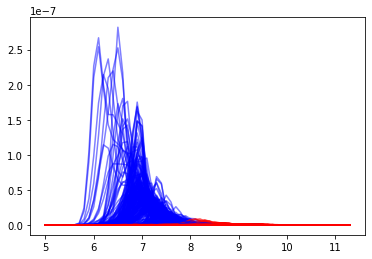

In [4]:
modags=[]
totpdf=np.zeros(len(hon.lgage))
gmag=joined['mag_g']
col =joined['bprp_col']
count=0
for i in range(len(gmag)):
    if not((np.isnan(col[i])) or (np.isnan(gmag[i]))):
        pdf=hon.g_kernal_den(col[i],gmag[i]);
        modags.append(np.max(pdf));
        if not(np.any(np.isnan(pdf))):
            totpdf=totpdf+pdf
            count+=1
        
print(count)
fig, ax = plt.subplots()
ax.plot(hon.lgage,(totpdf/simps(totpdf)))
ax.set_xlabel('log(age)')
ax.set_ylabel('Relative prob')
ax.set_title('Sym All')
fig.savefig('Tab_7_All_Complete_832_stars.png')